In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
# Any results you write to the current directory are saved as output.

In [ ]:
def encode(train,test):
    le = LabelEncoder().fit(train.species) # fit label encoder
    labels = le.transform(train.species)   # Transform labels to normalized encoding
    classes = list(le.classes_) #save column names for submission
    test_ids = test.id  # save test ids for submission
    
    train = train.drop(['species', 'id'], axis=1) #해당 컬럼들을 data에서 제거.
    test = test.drop(['id'], axis=1)
    
    return train,labels,test,test_ids,classes

train, labels, test, test_ids, classes = encode(train, test)
train.head(1)

stratification : class가 너무 많은 dataset에서 해야한다. train set과 test set에서 모든 클래스를 포함할 수 있도록 하는 과정이다.

정의

- 데이터의 편향 방지 + 편향된(잘못된) 모델 생성 방지

- 모집단의 특정 변수 비율에 맞추어 모집단을 쪼개어 해당 비율만큼 가지고 오는것(표본추출) = 비율을 맞춰줌 

- 층 내는 동질하게, 층끼리는 이질적이게 

- 전체 모집단 및 층별 특성도 효과적으로 추정가능 

- 데이터 셋의 특성 분포를 고르게 해준다 

In [ ]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=23)

for train_index, test_index in sss.split(train, labels):
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



log_cols = ["Classifier", "Accuracy","Log Loss"]
log = pd.DataFrame(columns = log_cols)



predict() : return 0 or 1

predict_proba : return probability of 1

In [ ]:
clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)
name = clf.__class__.__name__

print(name)
train_predictions = clf.predict(X_test)
print(train_predictions)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

train_predictions = clf.predict_proba(X_test)
print(train_predictions[:6])
ll = log_loss(y_test, train_predictions) #로그손실의 평균 계산
print("Log Loss:{}".format(ll))

K-근접 이웃 알고리즘

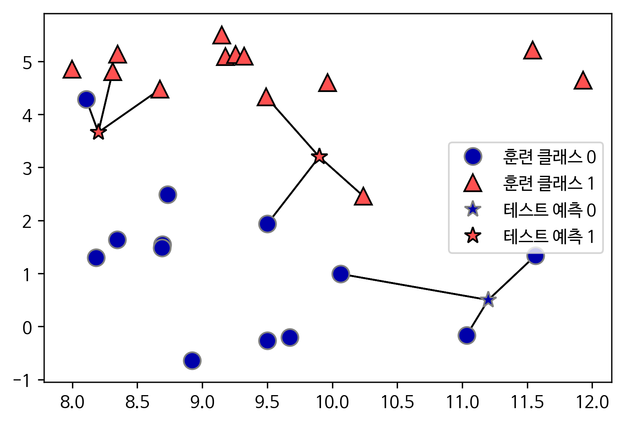

k=3이면
별 근처에 있는 가까운 이웃3개를 살펴보고 다수의 클래스가 레이블이 된다.

학습단계에서 실질적인 학습X. 학습데이터만 메모리에 저장함.

그러나 학습데이터가 크면 메모리 소모 많음

속도가 느릴수 있다(거리계산). 

고차원학습데이터인 경우 근사적으로 유사한 데이터를 효율적으로 검색해주는 locality sensitive hashing같은 방법 사용가능.



In [ ]:
clf = SVC(kernel='rbf', C=0.025, probability=True)

clf.fit(X_train, y_train)
name = clf.__class__.__name__

print(name)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

train_predictions = clf.predict_proba(X_test)
ll = log_loss(y_test, train_predictions) #로그손실의 평균 계산
print("Log Loss:{}".format(ll))

SVC = Support Vector Classifier

서포트벡터머신의 모형중 하나인 SVC
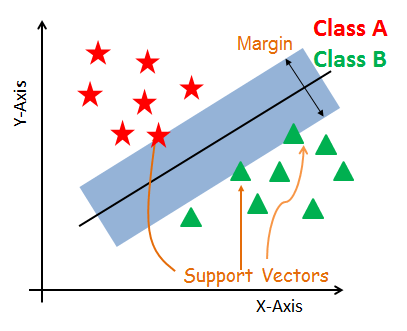

서포트벡터란, 결정경계와 가장 가까이 있는 학습 데이터를 말한다.
그 사이의 거리를 margin이라고 한다.

서포트벡터머신은 분류오차를 줄이면서 동시에 margin을 최대로 하는 결정경계를 찾는 학습을 하는 머신이다.


위 예시는 선형분류기이지만, 선형적으로 분류할 수 없을때는 더높은 차원으로 매핑한 후에 학습해야됨
그때 사용되는 함수를 kernel 이라고 부르고 여기서는 rbf라는 것을 선택하였다. c는 슬랙변수 가중치 인수


참고: https://datascienceschool.net/view-notebook/6c6d450cb2ee49558856fd924b326e00/

In [ ]:
clf = NuSVC(probability=True)
clf.fit(X_train, y_train)
name = clf.__class__.__name__

print(name)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

train_predictions = clf.predict_proba(X_test)
ll = log_loss(y_test, train_predictions) #로그손실의 평균 계산
print("Log Loss:{}".format(ll))

NuSVC는 SVC와 동일한데 c대신 Nu라는 인수를 사용한것이다.

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
name = clf.__class__.__name__

print(name)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

train_predictions = clf.predict_proba(X_test)
ll = log_loss(y_test, train_predictions) #로그손실의 평균 계산
print("Log Loss:{}".format(ll))

의사결정트리

분류법은 다음과 같다.
1. 여러 독립변수 중 하나의 독립변수를 선택하고 그 독립변수에 대한 threshold를 정한다. 이를 분류규칙이라고 함.
2. 전체 학습 데이터 집합(부모노드)를 기준값보다 작은 그룹(자식노드1)과 기준값보다 큰 그룹(자식노드2)로 나눈다.
3. 각각 자식 노드에 대해 1~2단계를 반복하여 자식노드를 계속만든다. 단, 자식 노드에 한가지 클래스 데이터만 존재한다면 더이상 자식노드를 만들지 않고 중지.


단점은 특징의 선택이 greedy한 방식으로 이루어져서 선택된 특징이 최적의 선택이 아닐 수 있다.

https://datascienceschool.net/view-notebook/16c28c8c192147bfb3d4059474209e0a/

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
name = clf.__class__.__name__

print(name)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

train_predictions = clf.predict_proba(X_test)
ll = log_loss(y_test, train_predictions) #로그손실의 평균 계산
print("Log Loss:{}".format(ll))

랜덤 포레스트 알고리즘

1. 복원추출로 여러개의 서로 다른 학습 데이터 집합을 만듬
2. 여러개의 데이터 집합을 결정트리로 만듬
3. 결정트리를 만들때 모든 feature를 다 사용하지 않고 무작위로 선택함.
4. 생성되는 각 결정트리는 서로 다른 형태를 띔.

장점: feature importance를 계산할 수 있음. 어떤 특징이 중요한지를 알 수 있음.


In [ ]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
name = clf.__class__.__name__

print(name)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

train_predictions = clf.predict_proba(X_test)
ll = log_loss(y_test, train_predictions) #로그손실의 평균 계산
print("Log Loss:{}".format(ll))

Boosting: 예측 성능이 조금 낮은 약한 분류기들을 조합하여 좀 더 좋은 성능을 발휘하는 하나의 강한 분류기를 만드는 방법

Adaboost : adaptive + boosting

분류기들이 상호보완하도록 단계적으로 학습됨.
약분류기들이 한 번에 하나씩 순차적으로 학습시킬 때, 먼저 학습된 분류기가 잘못 분류한 결과 정보를  다음 분류기의 학습 시 사용하여 이전 분류기의 단점을 보완. 

즉, **이전 분류기가 오분류한 샘플의 가중치를 adaptive하게 바꾸어가며
잘못 분류되는 데이터에 더 집중하여 잘 학습하고 분류할 수 있도록 한다.**

장점: 오류률이 낮고 코드가 간단. 조절을 위한 매개변수가 없음
단점: 오류 데이터(outlier)에 민감함.



In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
name = clf.__class__.__name__

print(name)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

train_predictions = clf.predict_proba(X_test)
ll = log_loss(y_test, train_predictions) #로그손실의 평균 계산
print("Log Loss:{}".format(ll))

Gradient Boosting model:

여러개의 decision tree를 묶어 강력한 model을 만드는 앙상블 기법

랜덤포레스트와 달리 이전 tree의 오차를 보완하는 방식으로 tree를 만든다.

그리고 무작위성이 없어서 강력한 pruning이 사용되고 tree깊이가 1~5정도밖에 되지않아서 메모리를 적게 사용하고 예측도 빠름.

특징: parameter 설정에 랜덤포레스트보다 조금더 민감하지만 잘 조정하면 높은 정확도를 제공함

(learning_rate를 높이면 오차를 강하게 보정하여 복잡한 모델만들어짐, n_estimator를 높이면 트리가 더 많이 추가되어 모델의 복잡도 커시고 train 셋를 더 정확하게 fitting)

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
name = clf.__class__.__name__

print(name)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

train_predictions = clf.predict_proba(X_test)
ll = log_loss(y_test, train_predictions) #로그손실의 평균 계산
print("Log Loss:{}".format(ll))

Naive bayes classification model 단순베이즈분류기

GaussianNB: 가우시안 정규분포 사용

기본적인 가정: "어떤 객체의 속성들이 서로 독립적" <=> 조건부독립을 이룸.

베이즈정리를 사용해서 분류기를 정의.


단순 베이즈 분류기는 분류 문제에서 가장 먼저 적용해보는 기본 분류기 모델.
어떤 분류기가 단순 베이즈분류기보다 성능이 못하면 의미가 없다고 간주해도됨.

단점: 1. 실수데이터일때 분류가 제대로 안됨.->해결방안: 데이터를 정수 구간별로 묶음
2. 빈번한 0: 확률계산결과가 0이 너무 빈번하게 나옴. -> bias값을 더해줌.
3. 종속성: 종속성이 있는 속성일 경우 문제발생.

http://arkainoh.blogspot.com/2018/07/nbc.html

In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
name = clf.__class__.__name__

print(name)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

train_predictions = clf.predict_proba(X_test)
ll = log_loss(y_test, train_predictions) #로그손실의 평균 계산
print("Log Loss:{}".format(ll))

In [ ]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
name = clf.__class__.__name__

print(name)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print("Accuracy: {:.4%}".format(acc))

train_predictions = clf.predict_proba(X_test)
ll = log_loss(y_test, train_predictions) #로그손실의 평균 계산
print("Log Loss:{}".format(ll))

LDA vs QDA

둘다 확률론적 생성모델이다.

즉 y의 클래스 값에 따른 x의 분포에 대한 정보를 알아낸 후,  베이즈 정리를 사용하여 주어진 x에 대한 y의 확률분포를 찾아냄.


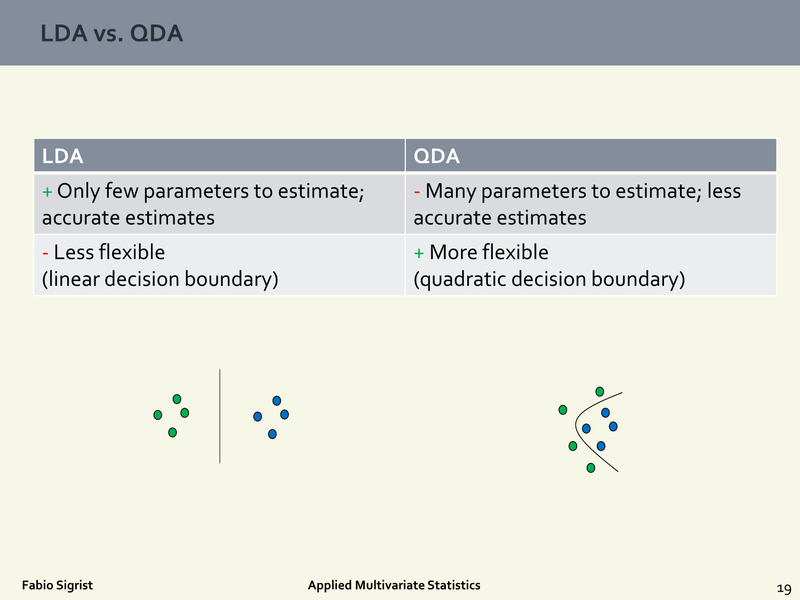
차이점:
- LDA는 오로지 적은 수의 파라미터만 예측하면 되고, 정확한 예측이 가능함. 반면에 QDA는 많은 파라미터가 예측되어야 하고, 그 예측이 덜 정확함.
- LDA는 선형의 결정경계를 가져서 덜 flexible하고, QDA는 2차 곡선의 경계를 가져서 LDA보다는 flexible함.

https://m.blog.naver.com/PostView.nhn?blogId=sw4r&logNo=221033110991&proxyReferer=https%3A%2F%2Fwww.google.com%2F

In [ ]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()